In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

from scipy.stats import chi2

from statsmodels.tsa.arima.model import ARIMA

In [42]:
df = pd.read_csv('./../Datasets/Index2018.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('b')
df = df.fillna(method='ffill')

In [43]:
data = df['ftse']
del df

data.head()

date
1994-01-07    3445.98
1994-01-10    3440.58
1994-01-11    3413.77
1994-01-12    3372.02
1994-01-13    3360.01
Freq: B, Name: ftse, dtype: float64

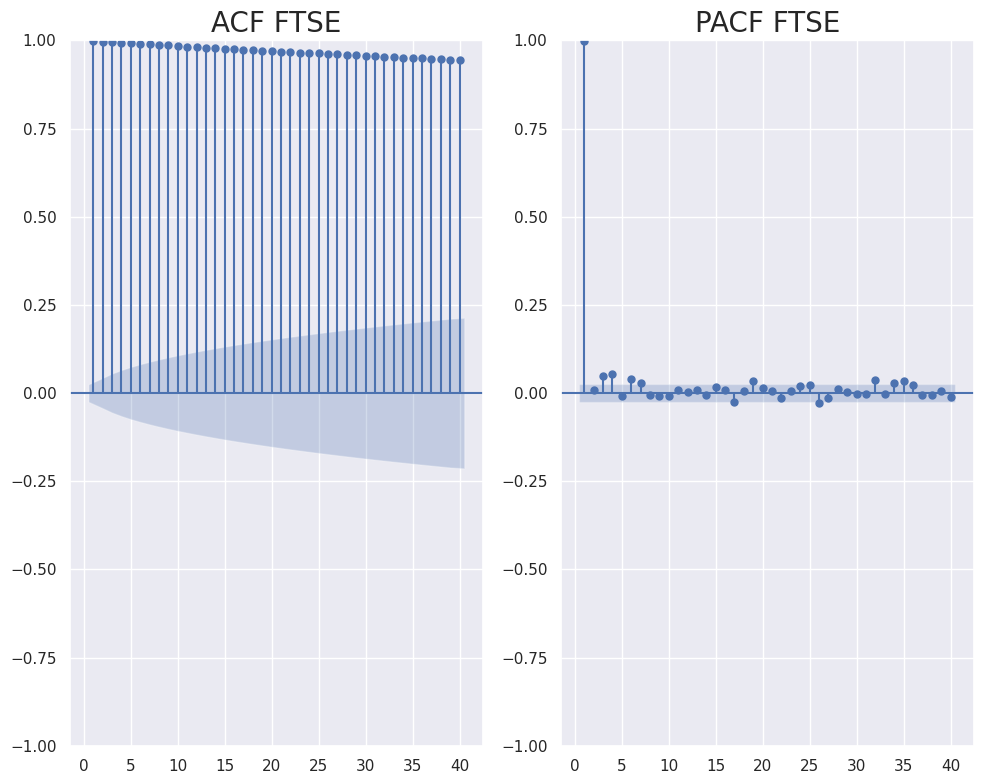

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

sgt.plot_acf(data, zero=False, lags=40, ax=ax1)
ax1.set_title("ACF FTSE", size=20)

sgt.plot_pacf(data, zero=False, lags=40, alpha=0.05, method='ols', ax=ax2)
ax2.set_title("PACF FTSE", size=20)

plt.tight_layout()
plt.show()

As the graph shows, the better estimator for today prices, are yesterday prices.

In [40]:
model = ARIMA(data, order=(1,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34437.979
Date:                Wed, 26 Jul 2023   AIC                          68881.958
Time:                        19:36:16   BIC                          68902.192
Sample:                    01-07-1994   HQIC                         68888.968
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6820    560.775      9.672      0.000    4324.582    6522.782
ar.L1          0.9990      0.001   1383.492      0.000       0.998       1.000
sigma2      3407.9480     36.199     94.145      0.000    3337.000    3478.896
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              3660.69
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.19
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""